# Model Comparison & Explanation

In [1]:
import some_load_train_evaluate_functions as ml

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Weak/Failing kidneys data

weak_kidney_df = ml.get_data_of_disease(driver, 'Weak/Failing kidneys')
weak_kidney_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Weak/Failing kidneys
0,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
1,93708,0,66,23.7,116.0,1.218750,0.192,0.127,NaN,0.7,...,109.00,22.0,13.2,58.32,2.870,247.0,32.0,30.1,0.655,0
2,93709,0,75,38.9,72.8,1.121212,0.009,0.017,28.561,0.6,...,129.00,31.0,15.4,NaN,NaN,NaN,21.0,46.5,NaN,0
3,93711,1,56,21.3,165.0,1.290323,0.173,0.079,31.115,0.4,...,40.60,19.0,14.7,31.68,4.086,139.0,16.0,34.8,0.542,0
4,93713,1,67,23.5,63.5,2.047619,0.028,0.028,18.344,0.6,...,238.00,26.0,14.2,NaN,NaN,123.0,27.0,28.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,102950,1,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5556,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,0
5557,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
5558,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0


## Load Models

In [4]:
# GaussianNB model
gnb = ml.joblib.load('../Models/Weak kidneys/GaussianNB.pkl')

# KNeighborsClassifier model
knn = ml.joblib.load('../Models/Weak kidneys/KNN.pkl')

# Logistic Regression model
log_reg = ml.joblib.load('../Models/Weak kidneys/Logistic_Regression.pkl')

# Random Forest Classifier model
rf = ml.joblib.load('../Models/Weak kidneys/Random_Forest_Classifier.pkl')

# SVM model
svm = ml.joblib.load('../Models/Weak kidneys/SVM.pkl')

# XGBoost Classifier model
xgb = ml.joblib.load('../Models/Weak kidneys/XGBoost_Classifier.pkl')

In [5]:
models = [log_reg, svm, gnb, knn, rf ,xgb]

In [6]:
# Feature sets

with open('../Models/Weak kidneys/Feature Sets/Logistic Regression Features.pkl', 'rb') as f:
    log_reg_features = ml.pickle.load(f)

with open('../Models/Weak kidneys/Feature Sets/SVM Features.pkl', 'rb') as f:
    svm_features = ml.pickle.load(f)
    
with open('../Models/Weak kidneys/Feature Sets/GaussianNB Features.pkl', 'rb') as f:
    gnb_features = ml.pickle.load(f)
    
with open('../Models/Weak kidneys/Feature Sets/KNN Features.pkl', 'rb') as f:
    knn_features = ml.pickle.load(f)
    
with open('../Models/Weak kidneys/Feature Sets/Random Forest Features.pkl', 'rb') as f:
    rf_features = ml.pickle.load(f)
    
with open('../Models/Weak kidneys/Feature Sets/XG Boost Features.pkl', 'rb') as f:
    xgb_features = ml.pickle.load(f)

In [7]:
feature_sets = [log_reg_features, svm_features, gnb_features, knn_features, rf_features, xgb_features]

## Metrics Evaluation and Model Comparison

In [8]:
# function to get model metrics

def get_model_metrics(model, X_test, y_test):

    y_pred = model.predict(X_test)

    cm = ml.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = ml.accuracy_score(y_test, y_pred)
    precision = ml.precision_score(y_test, y_pred)
    recall = ml.recall_score(y_test, y_pred)
    f1 = ml.f1_score(y_test, y_pred)
    mcc = ml.matthews_corrcoef(y_test, y_pred)
    roc_auc = ml.roc_auc_score(y_test, y_pred)
    prc_auc = ml.average_precision_score(y_test, y_pred)

    # Store metrics for tabulation
    metrics_data = {
        "Model": model.__class__.__name__,
        "Accuracy": round(accuracy,3),
        "Precision": round(precision,3),
        "Recall": round(recall,3),
        "F1-Score": round(f1,3),
        "MCC": round(mcc,3),
        "ROC AUC": round(roc_auc,3),
        "PRC AUC": round(prc_auc,3),
        "TP Rate": round(tp / (tp + fn),3),
        "FP Rate": round(fp / (fp + tn),3)
    }

    return metrics_data

In [9]:
metrics = []

for model, features in zip(models, feature_sets):
    
    # split data dropping null values
    X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(
        df=weak_kidney_df[features].dropna(), 
        label='Weak/Failing kidneys',
        impute=False, scale=True,
        random_state=42
    )
    
    # Get model metrics
    model_metrics = get_model_metrics(model, X_test, y_test)
    metrics.append(model_metrics)

In [10]:
# function to plot table of metrics

def create_metrics_table(metrics):
    
    num_metrics = len(metrics) + 1
    num_cols = len(metrics[0])

    fig, ax = ml.plt.subplots(figsize=(26, num_metrics+2 / 2))

    ax.set_frame_on(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    table_data = [list(row.values()) for row in metrics]
    header = list(metrics[0].keys())
    table = ax.table(cellText=table_data, cellLoc='center', loc='center', 
                     colLabels=header, bbox=[0, 0, 1, 1], colWidths=[8,3,3,3,3,3,3,3,3,3,3])

    table.auto_set_font_size(False)
    table.set_fontsize(20)

    ml.plt.show()

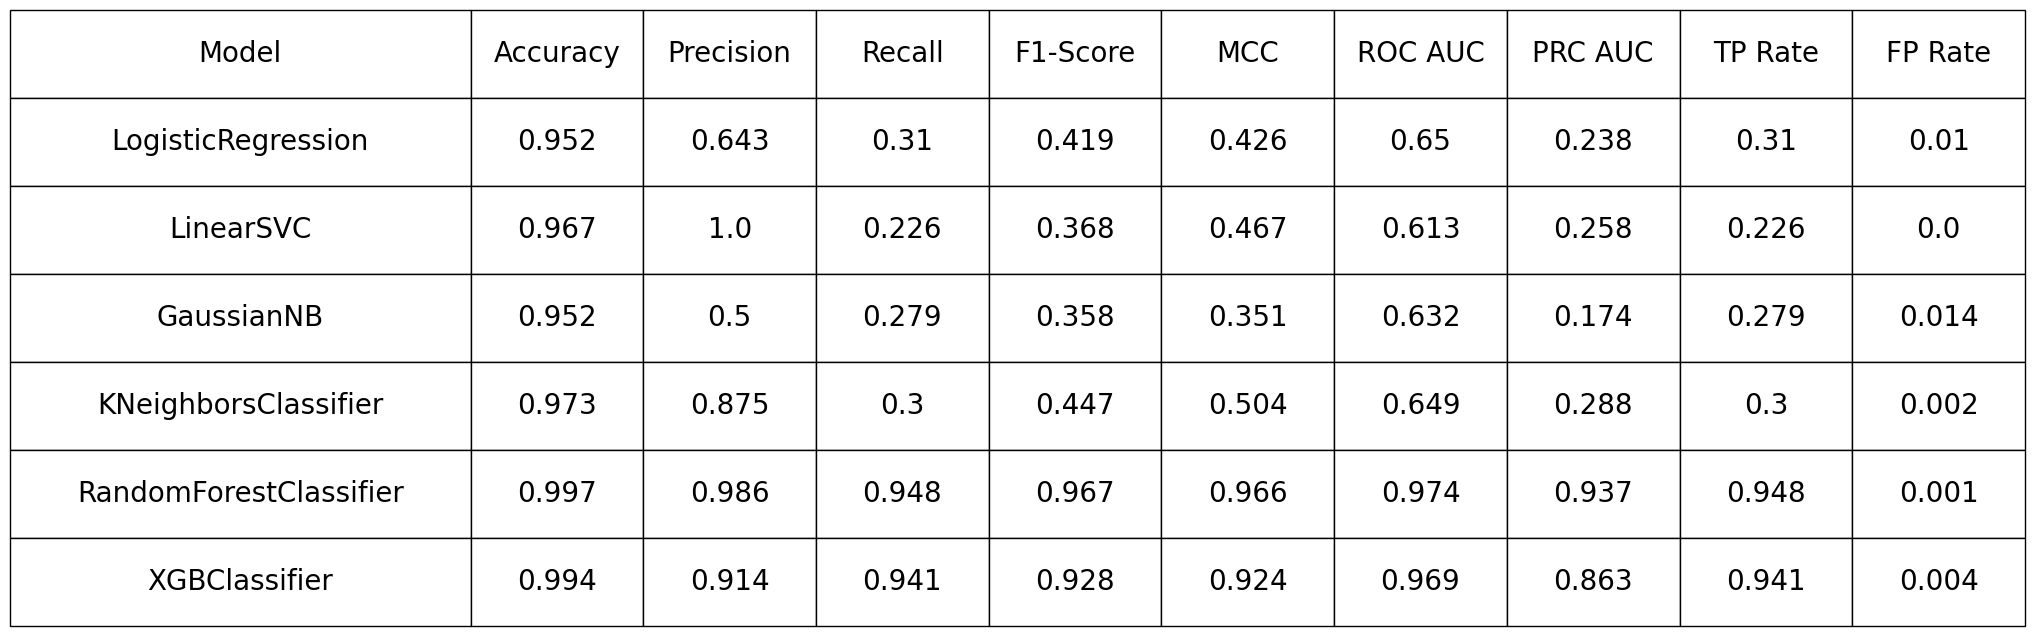

In [11]:

# Model metrics with null values dropped

create_metrics_table(metrics)

In [12]:
# Stratified k-cross validation of the models

for model, features in zip(models, feature_sets):
    
    X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(
        df=weak_kidney_df[features], 
        label='Weak/Failing kidneys',
        impute=True, scale=True, imputer=ml.SimpleImputer(strategy='most_frequent'),
        random_state=42
    )
    print(type(model).__name__)
    print('-----------------------------------')
    ml.stratified_k_cross_validate(model, X, y, n_splits=10)
    print('-----------------------------------\n')

LogisticRegression
-----------------------------------

Average Accuracy: 0.9643884892086332

Average Precision: 0.7264935064935065

Average Recall: 0.20217391304347823

Average F1-Score: 0.31023873795425516
-----------------------------------

LinearSVC
-----------------------------------

Average Accuracy: 0.9634892086330936

Average Precision: 0.8616666666666667

Average Recall: 0.11679841897233201

Average F1-Score: 0.20106602254428338
-----------------------------------

GaussianNB
-----------------------------------

Average Accuracy: 0.9580935251798561

Average Precision: 0.4807184482184482

Average Recall: 0.3231225296442687

Average F1-Score: 0.3821742482268798
-----------------------------------

KNeighborsClassifier
-----------------------------------

Average Accuracy: 0.9627697841726619

Average Precision: 0.6146320346320346

Average Recall: 0.2110671936758893

Average F1-Score: 0.3116683460217943
-----------------------------------

RandomForestClassifier
----------------

### Save Scaler

In [13]:
# Saving StandardScaler of XGB classifier

def save_scaler(df, feature_set, label, filename, scaler = ml.StandardScaler(), test_size=0.2, random_state=42):
    
    X = df[feature_set].dropna().drop([label], axis=1)
    y = df[feature_set].dropna()[label].copy()
    
    X_train, X_test, y_train, y_test = ml.train_test_split(X, y, test_size=test_size, random_state=random_state)
    scaler = scaler
    scaler.fit(X_train)

    try:
        with open(filename, 'wb') as file:
            ml.pickle.dump(scaler, file)
        print('Saved Standard Scaler')
    except Exception as e:
        print('Error: ', e)

In [14]:
if not ml.os.path.exists("../Models/Weak/Failing kidneys/Scaler"):
        ml.os.makedirs("../Models/Weak/Failing kidneys/Scaler")
        
save_scaler(df=weak_kidney_df, feature_set=xgb_features, label='Weak/Failing kidneys', 
            filename='../Models/Weak/Failing kidneys/Scaler/StandardScaler[XGB].pkl')

Saved Standard Scaler


# Explanation

### Permutation Importance

In [46]:
# Permuatation Importance - shows important features of a model

from sklearn.inspection import permutation_importance

def get_permutation_importances(model, X_test, y_test, n_repeats=10, random_state=42):
    
    result = permutation_importance(model, X_test, y_test, n_repeats=n_repeats, random_state=random_state)

    feature_names = X_test.columns
    importances = result.importances_mean

    perm_importance_df = ml.pd.DataFrame({"Feature": feature_names, "Permutation_Importance": importances})

    perm_importance_df = perm_importance_df.sort_values(by="Permutation_Importance", ascending=False)
    
    return perm_importance_df

In [47]:
X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(
        df=weak_kidney_df[rf_features],
        label='Weak/Failing kidneys',
        impute=True, scale=True,
        random_state=42
    )

perm_importances = get_permutation_importances(rf, X_test, y_test, n_repeats=30)
perm_importances.head(20)

,Feature,Permutation_Importance
0,Creatinine [mg/dL],0.026499
1,Blood Urea Nitrogen [mg/dL],0.011181
4,Ferritin [ng/mL],0.011031
2,Age,0.009907
3,BMI,0.008228
5,Retinol [umol/L],0.007044


### Partial Dependence Plot

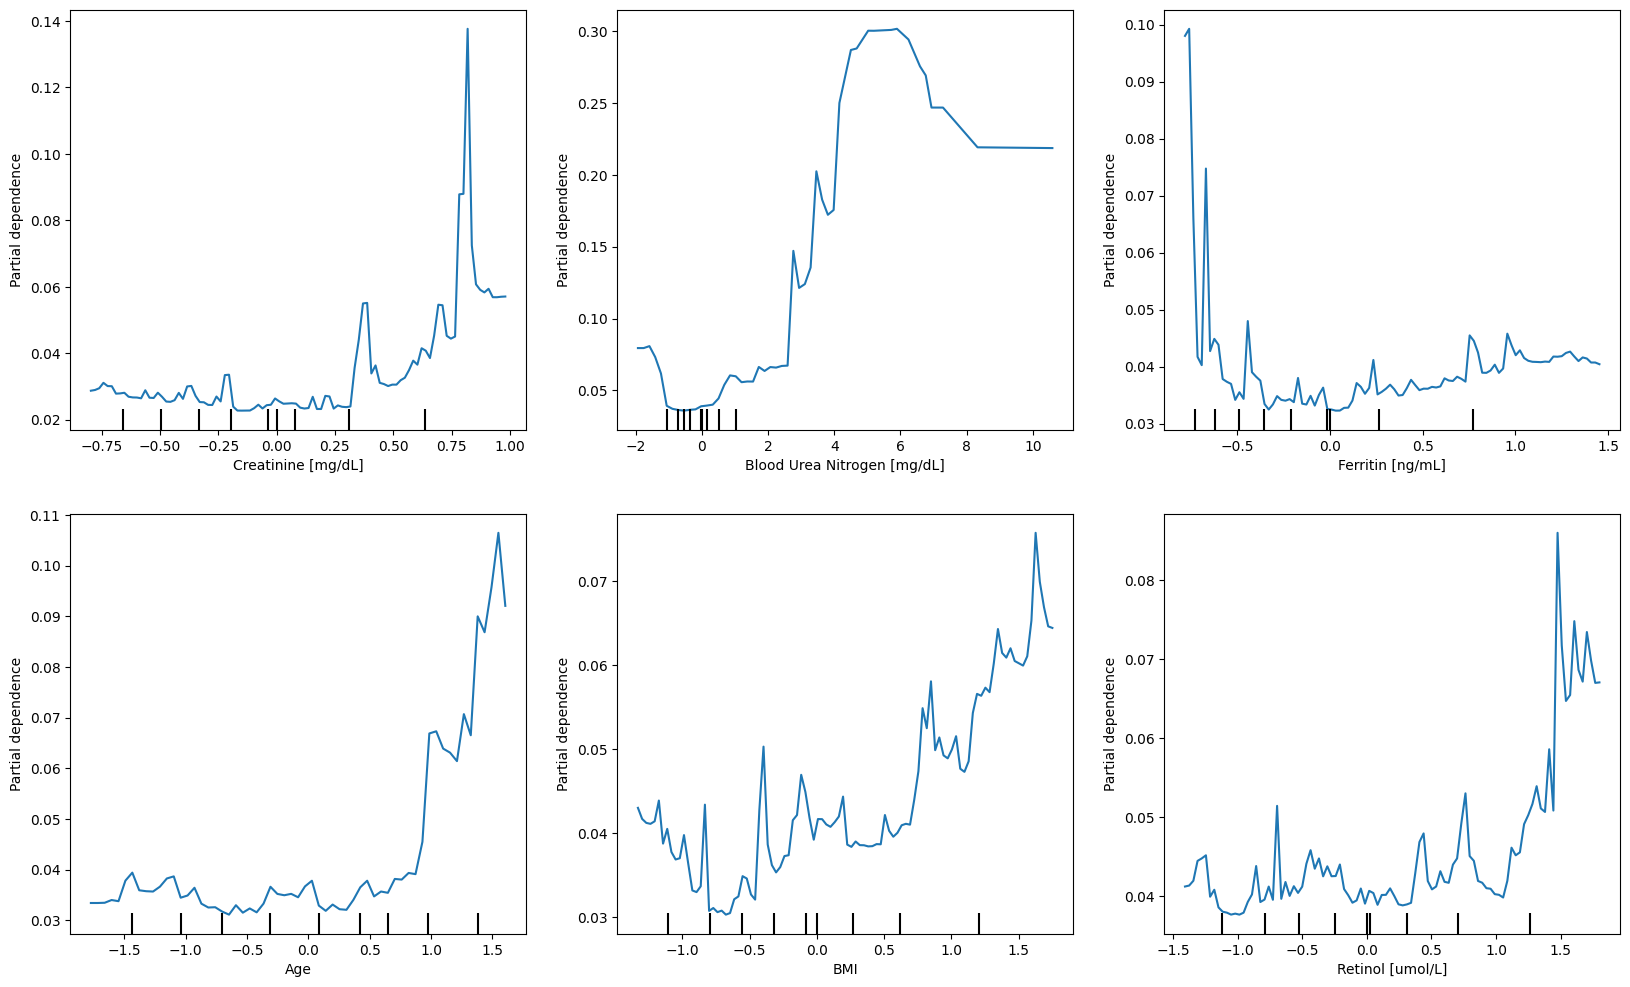

In [48]:
from sklearn.inspection import PartialDependenceDisplay

# Partial dependence plots show how a feature affects predictions

perm_features =  perm_importances.Feature.tolist()

fig, axs = ml.plt.subplots(2, 3, figsize=(20, 12))

for i, feature in enumerate(perm_features):
    disp = PartialDependenceDisplay.from_estimator(rf, X_val, [feature], ax=axs[i//3, i%3])
    
ml.plt.show()

### SHAP

In [49]:
# SHapley Additive exPlanations - break down a prediction to show the impact of each feature

import shap

# calculate shap values for a single row

def shap_explain_instance(model,instance, columns, matplotlib=True):
    
    explainer = shap.TreeExplainer(model)
    instance = instance.values.reshape(1, -1)
    shap_values = explainer.shap_values(instance)
    shap.initjs()
    
    return shap.force_plot(explainer.expected_value[0], shap_values[0], instance, 
                           feature_names=columns, matplotlib=matplotlib)

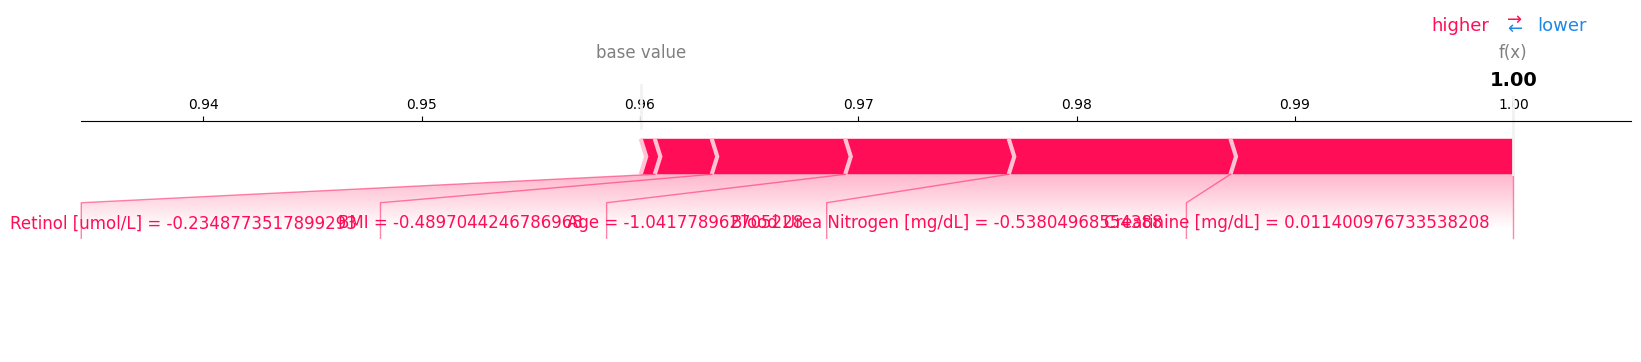

In [50]:
shap.initjs()

shap_explain_instance(rf, X_val.iloc[0], X_val.columns)

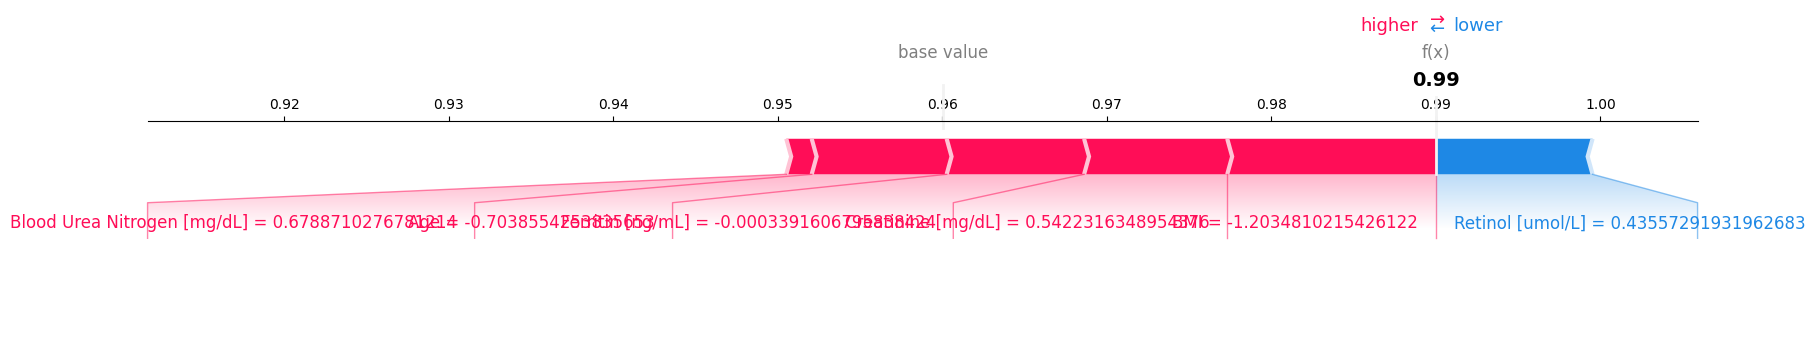

In [51]:
shap_explain_instance(rf, X_val.iloc[1], X_val.columns)

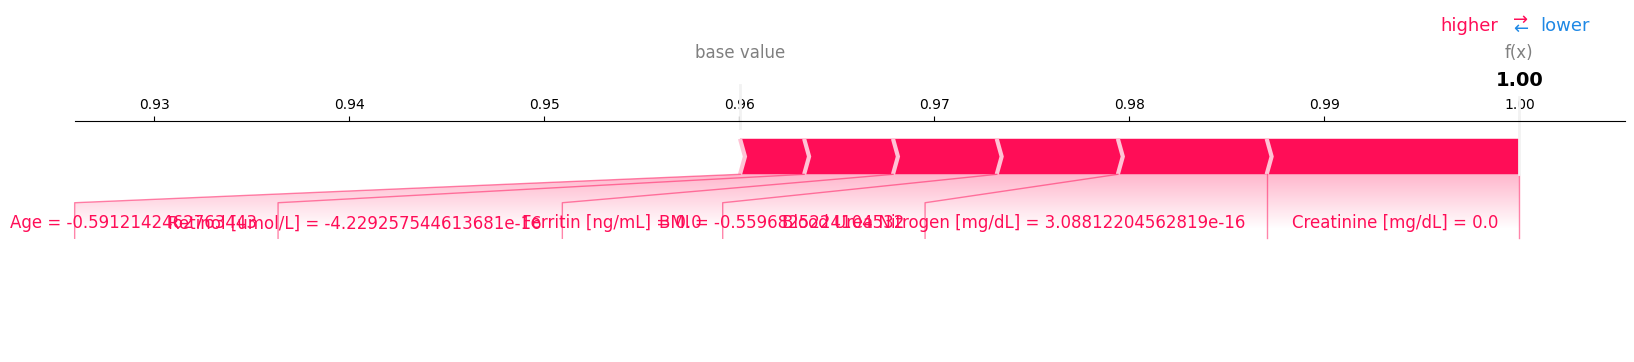

In [52]:
shap_explain_instance(rf, X_val.iloc[42], X_val.columns)

In [58]:
# calculate shap_values for all rows

def shap_summary_plot(model, instances, plot_type='bar'):
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(instances.values)

    return shap.summary_plot(shap_values[0], instances, plot_type=plot_type)

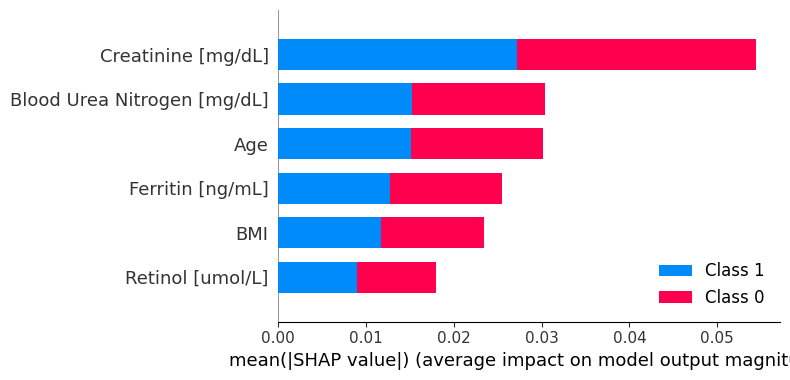

In [54]:
shap_summary_plot(rf, X_val, plot_type='bar')

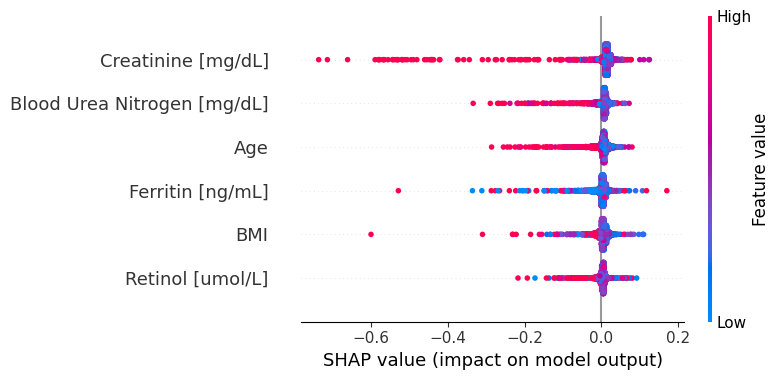

In [59]:
shap_summary_plot(rf, X_val, plot_type='dot')

In [60]:
# calculate shap_values for all rows with more detail

def shap_dependence_contribution_plot(model, instances, feature):
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(instances.values)

    return shap.dependence_plot(feature, shap_values[0], instances)

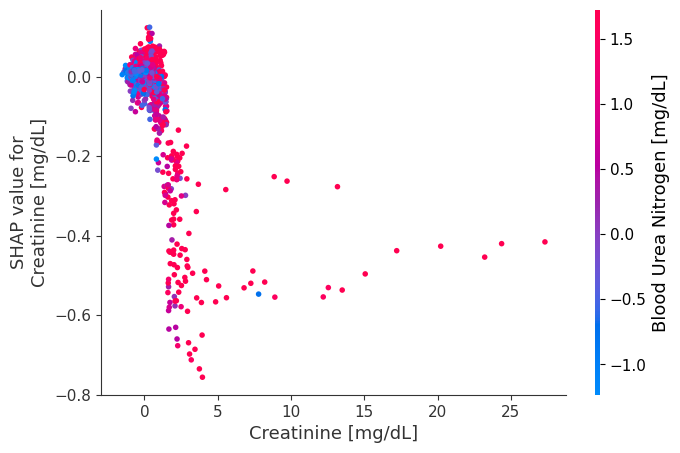

In [62]:
shap_dependence_contribution_plot(rf, instances=X, feature='Creatinine [mg/dL]')

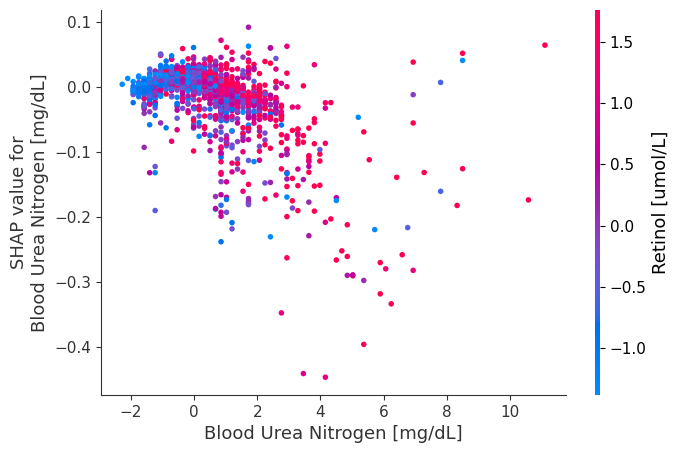

In [63]:
shap_dependence_contribution_plot(rf, instances=X, feature='Blood Urea Nitrogen [mg/dL]')

In [69]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train.iloc[:50].values)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[:50].values, feature_names=X_test.columns)